<a href="https://colab.research.google.com/github/ksh168/Machine-Learning-projects/blob/master/Minute%20Weather%20Dataset/minute_weather_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/drive/My Drive/kaggle/minute_weather.csv')
df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [3]:
df.shape

(1587257, 13)

Since this dataset is quite large, we need to take random samples. Additionally, for the K-means method it is essential to find the positioning of the initial centroids first so that the algorithm can find convergence. To do this, instead of working with the entire dataset, we draw up a sample and run short runs of randomly initialised centroids and track improvements in the metric.[(read more)](https://www.kdnuggets.com/2018/09/iterative-initial-centroid-search-sampling-k-means-clustering.html)

In [4]:
sample_df = df[(df['rowID'] % 10) == 0]
sample_df.shape

(158726, 13)

In [5]:
df.isnull().sum(axis = 'rows')

rowID                   0
hpwren_timestamp        0
air_pressure            0
air_temp                0
avg_wind_direction    433
avg_wind_speed        433
max_wind_direction    433
max_wind_speed        433
min_wind_direction    433
min_wind_speed        433
rain_accumulation       1
rain_duration           1
relative_humidity       0
dtype: int64

Checking for null values, we find rain_accumulation and rain_duration can be dropped


In [6]:
df1 = df.dropna(axis = 'rows')

In [7]:
df1.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
5,5,2011-09-10 00:05:49,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6


In [8]:
df1.shape

(1586823, 13)

Between the two values — max wind speed / direction and min wind speed / direction, I have chosen only max for the purposes of clustering as we already have the average values for both. The min values can also be included in the analysis if one chooses to. 

In [9]:
cols_of_interest = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed','max_wind_direction',
                    'max_wind_speed', 'relative_humidity']

In [10]:
df2 = df1[cols_of_interest]
df2.head()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
1,912.3,63.86,161.0,0.8,215.0,1.5,39.9
2,912.3,64.22,77.0,0.7,143.0,1.2,43.0
3,912.3,64.40,89.0,1.2,112.0,1.6,49.5
4,912.3,64.40,185.0,0.4,260.0,1.0,58.8
5,912.3,63.50,76.0,2.5,92.0,3.0,62.6


The next step is to scale our values to give them all equal importance. Scaling is also important from a clustering perspective as the distance between points affects the way clusters are formed.

In [11]:
# Using the StandardScaler
from sklearn.preprocessing import StandardScaler

In [12]:
X = StandardScaler().fit_transform(df2)
X

array([[-1.4845933 ,  0.16942291, -0.01014011, ...,  0.55860634,
        -0.78402129, -0.29367037],
       [-1.4845933 ,  0.19984704, -0.89241793, ..., -0.22089095,
        -0.90782621, -0.1753875 ],
       [-1.4845933 ,  0.2150591 , -0.76637824, ..., -0.55650784,
        -0.74275299,  0.07262495],
       ...,
       [-0.30484867,  1.0821467 , -1.54362298, ..., -1.31435243,
        -0.45387484, -0.04947349],
       [-0.30484867,  1.0821467 , -1.61714614, ..., -1.50922675,
        -0.49514314, -0.05328907],
       [-0.30484867,  1.0821467 , -1.57513291, ..., -1.54170581,
        -0.49514314, -0.04947349]])

### K Means clustering

In [13]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 12)

In [14]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
y_predict = model.predict(X)

Calculating the silhouette coefficient

In [16]:
from sklearn import metrics
labels = model.labels_

In [17]:
#metrics.silhouette_score(X, labels, metric = 'euclidean')

and the CH score

In [18]:
metrics.calinski_harabasz_score(X, labels)

365234.35894485825

Let us try this for another randomly chosen value i.e. n_clusters = 8

In [19]:
model_8 = KMeans(n_clusters=8)
model_8.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
y_predict_8 = model_8.predict(X)

Once again, calculating the silhouette coefficient and CV scores


In [21]:
labels_8 = model_8.labels_

In [22]:
#metrics.silhouette_score(X, labels_8, metric = 'euclidean')

In [23]:
metrics.calinski_harabasz_score(X, labels_8)

410932.6891739766

### Using elbow plot to find the optimal value of n_clusters

Two values are of importance here — distortion and inertia. Distortion is the average of the euclidean squared distance from the centroid of the respective clusters. Inertia is the sum of squared distances of samples to their closest cluster centre

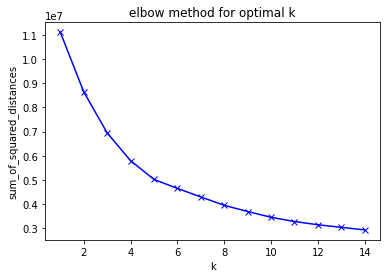

In [24]:
#for each value of k, we can initialise k_means and use inertia to identify the
# sum of squared distances of samples to the nearest cluster centre
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    model = KMeans(n_clusters = k)
    model.fit(X)
    sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

We care about intra-cluster similarity in K-means and this is what an elbow plot helps to capture. So n_clusters = 12 seems to be the elbow point

In [30]:
#function that creates a dataframe with a column for cluster number
def pd_centers(cols_of_interest, centers):
        colNames = list(cols_of_interest)
        colNames.append('prediction')
# Zip with a column called 'prediction' (index)
        Z = [np.append(A, index) for index, A in enumerate(centers)]
# Convert to pandas data frame for plotting
        P = pd.DataFrame(Z, columns=colNames)
        P['prediction'] = P['prediction'].astype(int)
        return P

In [31]:
#centers = model_5.cluster_centers_      # enter the model here
centers = model.cluster_centers_         # 12 cluster model
features = cols_of_interest
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,-0.246600,0.638385,0.413710,0.730202,0.519188,0.667130,-0.143749,0
1,-0.248763,0.902492,-1.308289,-0.581047,-1.168136,-0.597272,-0.606004,1
2,-0.645610,-1.238112,0.395883,0.706671,0.501408,0.684105,1.342402,2
3,-0.639938,0.612672,0.189167,-0.598067,0.358451,-0.611106,-0.183409,3
4,0.621262,-0.975225,0.877005,-0.469597,1.089347,-0.439000,0.971762,4
5,0.095588,0.903062,1.415092,-0.633621,1.677832,-0.585811,-0.739898,5
6,1.256872,-0.046991,-1.228146,-0.426644,-1.080879,-0.424428,-0.903368,6
7,0.257348,0.342062,1.890322,-0.648626,-1.550916,-0.572242,-0.324386,7
8,1.211061,-0.085422,-1.134051,1.041322,-1.024656,1.118012,-1.073062,8
9,-1.259360,-0.797317,0.457395,2.049303,0.545977,2.009524,0.840868,9


In [32]:
# Function that creates Parallel Plots
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

### Dry Days
(RH < -50%)

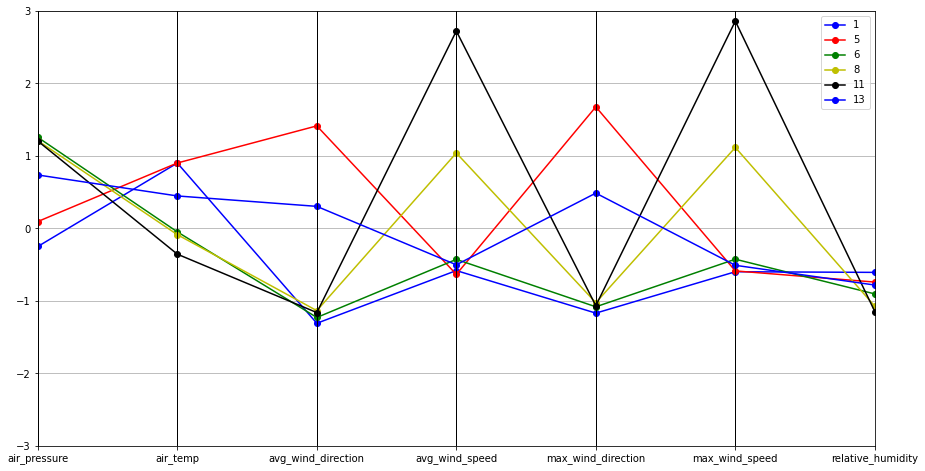

In [33]:
parallel_plot(P[P['relative_humidity'] < -0.5])

### Warm Days
(RH > 50%)

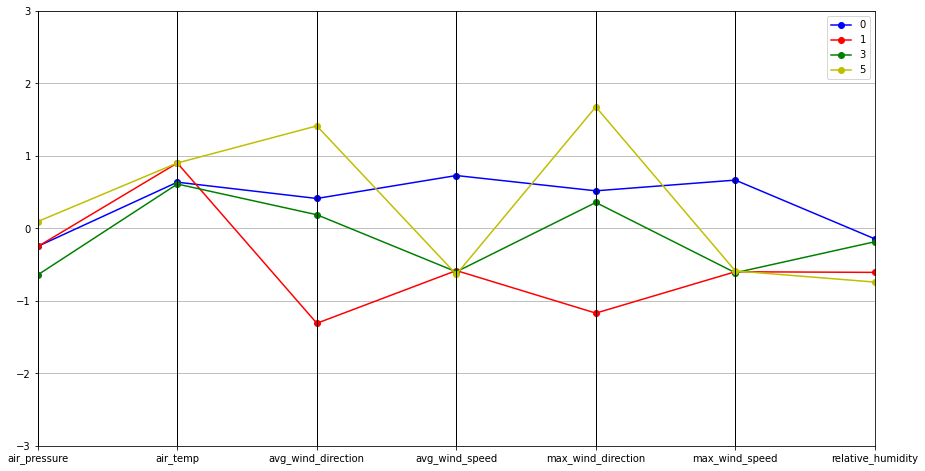

In [34]:
parallel_plot(P[P['air_temp'] > 0.5])

### Cool Days

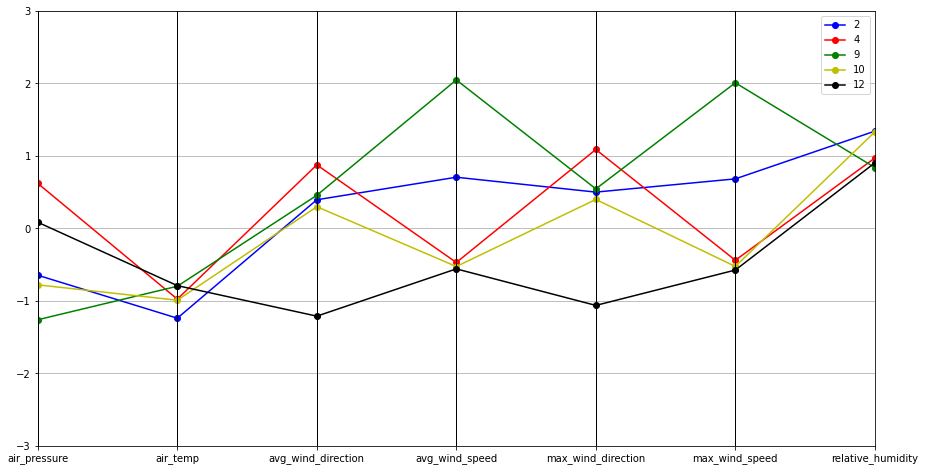

In [35]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])